In [1]:

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from surprise import Reader, Dataset, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, \
    KNNWithZScore, BaselineOnly, CoClustering, accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
init_notebook_mode(connected=True)

import numpy as np
import pandas as pd
import csv

import sklearn
from sklearn.decomposition import TruncatedSVD as TSVD

columns = ['id','task','TaskId','rating']
frame = pd.read_csv('DataRecommenderSystem/DataInterviewVisitor.csv',sep=',', names=columns)
frame.head()

,id,task,TaskId,rating
0,0,11010,1,7
1,1,10010,2,7
2,2,11010,3,8
3,3,1000,4,7
4,4,10000,5,6


In [2]:
columns2 =['TaskId','TaskName','Task']
tasks = pd.read_csv('DataRecommenderSystem/TasksInterviewVisitor.csv', sep=',', names = columns2, encoding='latin-1')
task_names = tasks[['TaskId','TaskName','Task']]
task_names.head()

#add
data = frame['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / frame.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Interview Task-ratings'.format(frame.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


#add

In [3]:
combined_task_data = pd.merge(frame, task_names, on='TaskId')
combined_task_data.head()

,id,task,TaskId,rating,TaskName,Task
0,0,11010,1,7,Task1,11010
1,6,11010,1,9,Task1,11010
2,7,11010,1,7,Task1,11010
3,19,11010,1,10,Task1,11010
4,22,11010,1,4,Task1,11010


In [4]:
combined_task_data.groupby('TaskId')['rating'].count().sort_values(ascending=True).head()

filter_interview = combined_task_data['TaskId']==0
combined_task_data[filter_interview]['TaskName'].unique()

#add
# Create trace
trace = go.Histogram(x = combined_task_data.TaskId,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 1000,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Interview Task',
                   xaxis = dict(title = 'Number of Ratings Per Task'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.1)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
#add

#add
# Create trace
trace = go.Histogram(x = combined_task_data.id,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 1000,
                                  size = 100))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Interview Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.1)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
#add

In [5]:
rating_crosstab = combined_task_data.pivot_table(values='rating', index='id', columns=['TaskName','Task'], fill_value=0.01)
rating_crosstab

TaskName,Task1,Task10,Task2,Task3,Task4,Task5,Task6,Task7,Task8,Task9
Task,11010,1010,10010,1000,10000,1111110,11110,1110,111010,101110
id,,,,,,,,,,
0,7.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,0.01,0.01,7.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,0.01,0.01,0.01,8.00,0.01,0.01,0.01,0.01,0.01,0.01
3,0.01,0.01,0.01,0.01,7.00,0.01,0.01,0.01,0.01,0.01
4,0.01,0.01,0.01,0.01,0.01,6.00,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...
995,6.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
996,0.01,0.01,0.01,0.01,0.01,0.01,0.01,9.00,0.01,0.01


In [6]:
rating_crosstab.shape
X = rating_crosstab.T
X.shape

(10, 980)

In [7]:
# truncated_SVD = TSVD(n_components=10, random_state=42)
# 
# resultant_matrix = truncated_SVD.fit_transform(X)
# 
# resultant_matrix.shape

In [8]:
# corr_mat = np.corrcoef(resultant_matrix)
# corr_mat.shape
# task_names = rating_crosstab.columns
# task_list = list(task_names)
# task_list
# task = task_list.index(('Task4',10000))
# task
# corr_1 = corr_mat[task]
# corr_1.shape
# corr_1

In [9]:
# with open('DataRecommenderSystem/recommenderSystemInterview.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(corr_1)
#     writer.writerow(list(task_names[(corr_1<=1) & (corr_1 > -0.12)]))



In [10]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(combined_task_data[['id', 'TaskId', 'rating']], reader)

In [35]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    print(algorithm)
    results = cross_validate(algorithm, data, cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
smt = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   
print(smt)
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, cv=5, verbose=False)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

{'test_rmse': array([3.0408949 , 3.34264125, 3.12431547, 3.15723594, 3.10388998]),
 'test_mae': array([2.56681891, 2.94415134, 2.74065342, 2.7512618 , 2.6358225 ]),
 'fit_time': (0.006018161773681641,
  0.0029861927032470703,
  0.006995201110839844,
  0.003998994827270508,
  0.0019991397857666016),
 'test_time': (0.001996755599975586,
  0.001999378204345703,
  0.00099945068359375,
  0.0020110607147216797,
  0.001999378204345703)}

In [12]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)



Estimating biases using als...
RMSE: 3.1563


3.156345871524711

In [36]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]
print(best_predictions)
print(worst_predictions)

     uid  iid  rui       est                    details  Iu   Ui       err
49   362    6  4.0  4.204533  {'was_impossible': False}   0   31  0.204533
140    9    6  4.0  4.204533  {'was_impossible': False}   0   31  0.204533
240  531    2  5.0  5.240088  {'was_impossible': False}   0  128  0.240088
81   741    9  6.0  5.640148  {'was_impossible': False}   0   29  0.359852
197  941    9  6.0  5.640148  {'was_impossible': False}   0   29  0.359852
24   126    9  6.0  5.640148  {'was_impossible': False}   0   29  0.359852
150  444    3  5.0  4.638436  {'was_impossible': False}   0   83  0.361564
128  173    1  5.0  5.394732  {'was_impossible': False}   0  210  0.394732
225  295    1  5.0  5.394732  {'was_impossible': False}   0  210  0.394732
107  157    1  5.0  5.394732  {'was_impossible': False}   0  210  0.394732
     uid  iid   rui       est                    details  Iu   Ui       err
112  682    1   0.0  5.394732  {'was_impossible': False}   0  210  5.394732
218  479    1   0.0  5.

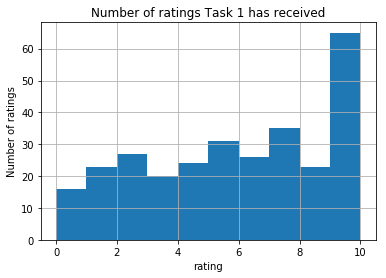

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
combined_task_data.loc[combined_task_data['TaskId'] == 1]['rating'].hist()
#fig = plt.figure()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings Task 1 has received')
plt.show();


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

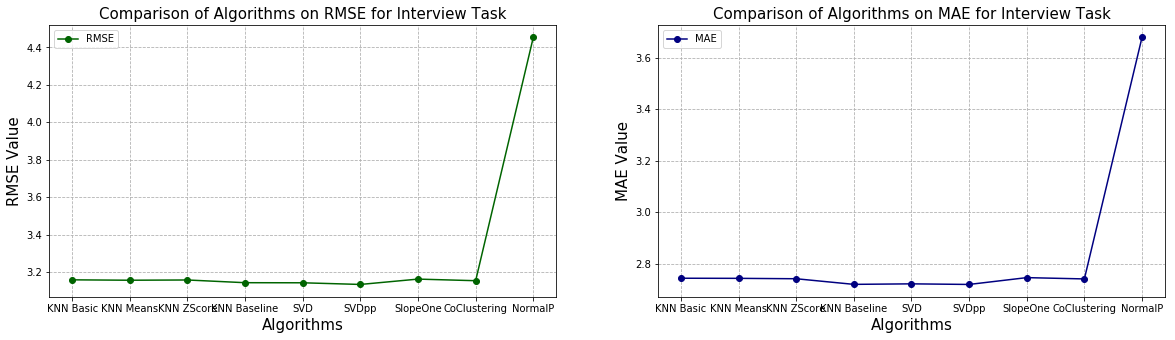

,id,task,TaskId,rating
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,5.936050e+04,3.810000,5.228000
std,288.819436,2.161298e+05,2.800311,3.161014
min,0.000000,1.000000e+03,1.000000,0.000000
25%,249.750000,1.001000e+04,1.000000,2.000000
50%,499.500000,1.101000e+04,3.000000,5.000000
75%,749.250000,1.101000e+04,6.000000,8.000000
max,999.000000,1.111110e+06,11.000000,10.000000


In [15]:
# SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, verbose=False)
svd_cv = cross_validate(SVD(), data, cv=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=5, verbose=False)
#nmf_cv = cross_validate(NMF(), data, cv=5, n_jobs=5, verbose=False)
slope_cv = cross_validate(SlopeOne(), data, cv=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=5, verbose=False)
normalPredictor_cv= cross_validate(NormalPredictor(),data, cv=5, verbose=False)
knnBaseline_cv = cross_validate(KNNBaseline(), data, cv=5, verbose=False)

print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 6), '\t', round(knnbasic_cv['test_mae'].mean(), 6))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 6), '\t', round(knnmeans_cv['test_mae'].mean(), 6))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 6), '\t', round(knnz_cv['test_mae'].mean(), 6))
print('KNN Baseline', '\t', round(knnBaseline_cv['test_rmse'].mean(), 6), '\t', round(knnBaseline_cv['test_mae'].mean(), 6))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 6), '\t', round(svd_cv['test_mae'].mean(), 6))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 6), '\t', round(svdpp_cv['test_mae'].mean(), 6))
#print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 6), '\t', round(slope_cv['test_mae'].mean(), 6))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 6), '\t', round(coclus_cv['test_mae'].mean(), 6))
print()
print('NormalPred', '\t', round(normalPredictor_cv['test_rmse'].mean(), 6), '\t', round(normalPredictor_cv['test_mae'].mean(), 6))
print()

x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'KNN Baseline', 'SVD', 'SVDpp', 'SlopeOne', 'CoClustering', 'NormalP']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, knnBaseline_cv, svd_cv, svdpp_cv, slope_cv, coclus_cv, normalPredictor_cv]

rmse_cv = [round(res['test_rmse'].mean(), 6) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 6) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE for Interview Task', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE for Interview Task', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()
frame.describe()

In [60]:
# Parameter space
svd_param_grid = {'n_epochs': [20, 25], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

svdpp_gs = GridSearchCV(SVDpp, svd_param_grid, measures=['rmse', 'mae'], cv=5)
svdpp_gs.fit(data)

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5)
svd_gs.fit(data)

print('SVDpp - RMSE:', round(svdpp_gs.best_score['rmse'], 6), '; MAE:', round(svdpp_gs.best_score['mae'], 6))
print('SVD   - RMSE:', round(svd_gs.best_score['rmse'], 6), '; MAE:', round(svd_gs.best_score['mae'], 6))
#SVDpp best params
print('RMSE =', svdpp_gs.best_params['rmse'])
print('MAE =', svdpp_gs.best_params['mae'])
#SVD best params
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])



SVDpp - RMSE: 3.142937 ; MAE: 2.724792
SVD   - RMSE: 3.144542 ; MAE: 2.729209
RMSE = {'n_epochs': 25, 'lr_all': 0.002, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.002, 'reg_all': 0.4}
RMSE = {'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.6}
MAE = {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

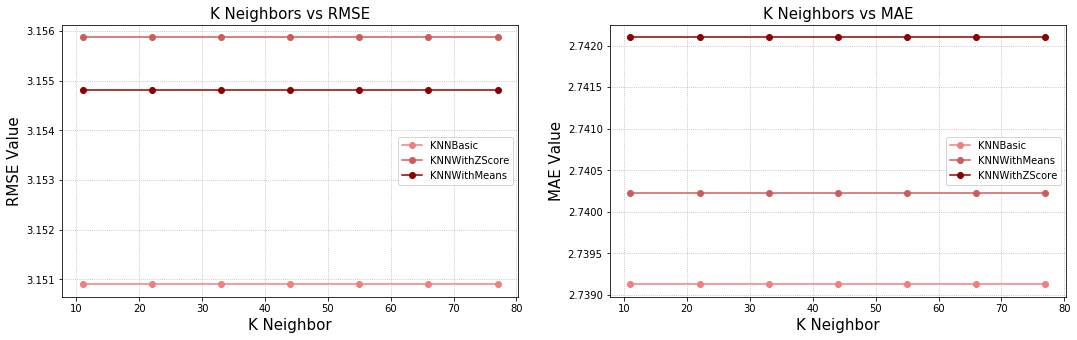

In [18]:
param_grid = {'k': [11, 22, 33, 44, 55, 66, 77]}

knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
knnmeans_gs.fit(data)

knnz_gs = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse', 'mae'], cv=5)
knnz_gs.fit(data)

x = [11, 22, 33, 44, 55, 66, 77]
y1 = knnbasic_gs.cv_results['mean_test_rmse']
y2 = knnbasic_gs.cv_results['mean_test_mae']

y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

y5 = knnz_gs.cv_results['mean_test_rmse']
y6 = knnz_gs.cv_results['mean_test_mae']

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y5, label='KNNWithZScore', color='indianred', marker='o')
plt.plot(x, y3, label='KNNWithMeans', color='darkred', marker='o')

plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y4, label='KNNWithMeans', color='indianred', marker='o')
plt.plot(x, y6, label='KNNWithZScore', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()

In [30]:
import surprise
from surprise import SVD
from surprise import Dataset
from surprise import accuracy


lower_rating = frame['rating'].min()
upper_rating = frame['rating'].max()

reader = surprise.Reader(rating_scale =(0,10))
#data = surprise.Dataset.load_from_df(frame,reader)

alg=surprise.SVDpp()
output=alg.fit(data.build_full_trainset())

pred = alg.predict(uid=0,iid=1)
score = pred.est
print(score)

iids = frame['TaskId'].unique()
iids0 = frame.loc[frame['id']==0,'TaskId']
print(iids0)
iids_to_pred = np.setdiff1d(iids,iids0)

testset = [[0,iid,3.] for iid in iids_to_pred]
predictions = alg.test(testset)

pred_ratings = np.array([pred.est for pred in predictions])
i_max = np.argpartition(pred_ratings, -3)[-3:]
print(i_max)
iid = iids_to_pred[i_max[0]]
iid2=iids_to_pred[i_max[1]]
iid3=iids_to_pred[i_max[2]]
print('Top item for user 50 has TaskId {0} with pred rating {1}'.format(iid,pred_ratings[i_max[0]]))
print('Top item for user 50 has TaskId {0} with pred rating {1}'.format(iid2,pred_ratings[i_max[1]]))
print('Top item for user 50 has TaskId {0} with pred rating {1}'.format(iid3,pred_ratings[i_max[2]]))

with open('DataRecommenderSystem/recommenderSystemInterview.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(corr_1)
    writer.writerow(list([iid,iid2,iid3]))




7.072818588299215
0    1
Name: TaskId, dtype: int64
[3 5 0]
Top item for user 50 has TaskId 5 with pred rating 5.525922871069838
Top item for user 50 has TaskId 7 with pred rating 5.888472087516581
Top item for user 50 has TaskId 2 with pred rating 5.540373172935394
